# **Introduction**

- Name : Harun Hawari Ash Shiddiq
- Data set : https://www.kaggle.com/kritikseth/fruit-and-vegetable-image-recognition?select=train
- Objective : 
    - Mampu memahami konsep Computer Vision/NLP
    - Mampu mempersiapkan data untuk digunakan dalam model Computer Vision/NLP
    - Mampu menganalisis dan menjelaskan layer yang dibuat

# **Import Libary**

In [7]:
# Packages for Cleaning and Processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Packages for Model Building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv

# Packages for Evaluation
from sklearn.metrics import classification_report

# **Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
% cd /content/gdrive/My Drive/Milestone

UsageError: Line magic function `%` not found.


In [ ]:
! ls 

**Melihat isi direktori**

In [2]:
import os

for dirpath, dirnames, filenames in os.walk('buah'):
  print(f"Ada {len(dirnames)} direktori dan {len(filenames)} gambar didalam {dirpath}")

Ada 3 direktori dan 0 gambar didalam buah
Ada 36 direktori dan 0 gambar didalam buah\test
Ada 0 direktori dan 10 gambar didalam buah\test\apple
Ada 0 direktori dan 9 gambar didalam buah\test\banana
Ada 0 direktori dan 10 gambar didalam buah\test\beetroot
Ada 0 direktori dan 10 gambar didalam buah\test\bell pepper
Ada 0 direktori dan 10 gambar didalam buah\test\cabbage
Ada 0 direktori dan 10 gambar didalam buah\test\capsicum
Ada 0 direktori dan 10 gambar didalam buah\test\carrot
Ada 0 direktori dan 10 gambar didalam buah\test\cauliflower
Ada 0 direktori dan 10 gambar didalam buah\test\chilli pepper
Ada 0 direktori dan 10 gambar didalam buah\test\corn
Ada 0 direktori dan 10 gambar didalam buah\test\cucumber
Ada 0 direktori dan 10 gambar didalam buah\test\eggplant
Ada 0 direktori dan 10 gambar didalam buah\test\garlic
Ada 0 direktori dan 10 gambar didalam buah\test\ginger
Ada 0 direktori dan 10 gambar didalam buah\test\grapes
Ada 0 direktori dan 10 gambar didalam buah\test\jalepeno
Ada 0 

>- Terdapat 100 gambar train untuk setiap class
>- Terdapat 10 gambar validation untuk setiap class
>- Terdapat 10 gambar test untuk setiap class

**Mendefinisikan nama class/target dari dataset buah**

In [3]:
import pathlib

data_dir = pathlib.Path("buah/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['apple' 'banana' 'beetroot' 'bell pepper' 'cabbage' 'capsicum' 'carrot'
 'cauliflower' 'chilli pepper' 'corn' 'cucumber' 'eggplant' 'garlic'
 'ginger' 'grapes' 'jalepeno' 'kiwi' 'lemon' 'lettuce' 'mango' 'onion'
 'orange' 'paprika' 'pear' 'peas' 'pineapple' 'pomegranate' 'potato'
 'raddish' 'soy beans' 'spinach' 'sweetcorn' 'sweetpotato' 'tomato'
 'turnip' 'watermelon']


## **Eksplorasi Data**

**Definisikan fungsi untuk memanggil image**

In [8]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  # ambil sembarang image
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img);
  plt.title(target_class);
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

**Apel**

Image shape: (1211, 1252, 4)


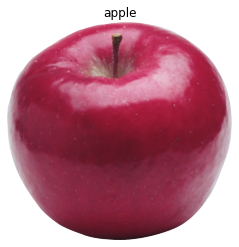

In [5]:
img = view_random_image(target_dir='buah/train/', target_class='apple')

**Pisang**

Image shape: (938, 704, 3)


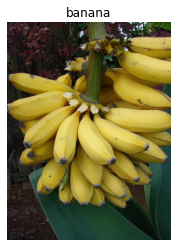

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='banana')

**Ubi Bit**

Image shape: (533, 800, 3)


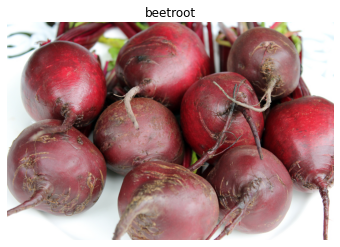

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='beetroot')

**Paprika**

Image shape: (1156, 1734, 3)


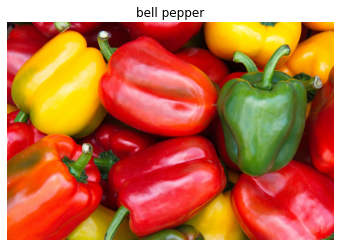

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='bell pepper')

**Kubis**:

Image shape: (1340, 1024, 3)


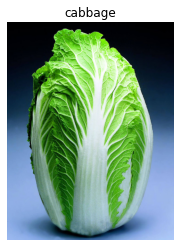

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='cabbage')

**Capsicum**

Image shape: (700, 1024, 3)


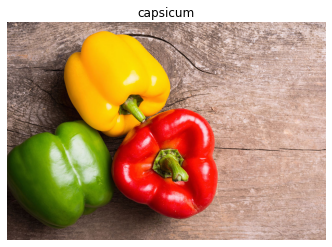

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='capsicum')

**Wortel**

Image shape: (500, 500, 3)


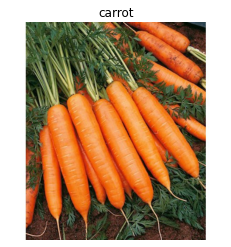

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='carrot')

**Bunga Kol**

Image shape: (600, 903, 3)


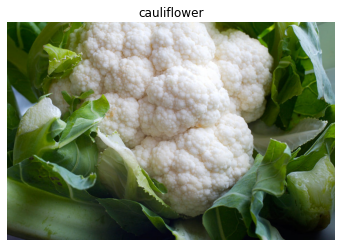

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='cauliflower')

**Cabai**

Image shape: (823, 823, 3)


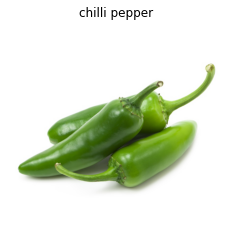

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='chilli pepper')

**Jagung**

Image shape: (644, 1000, 3)


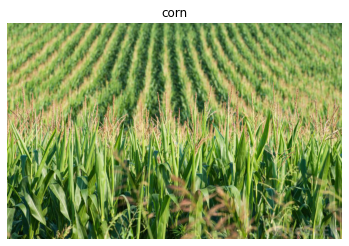

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='corn')

**Ketimun**

Image shape: (950, 900, 3)


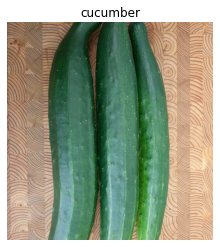

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='cucumber')

**Terong**

Image shape: (1151, 1668, 3)


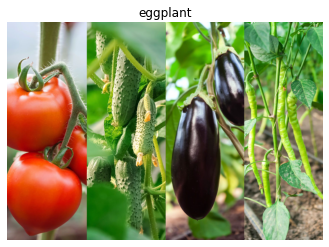

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='eggplant')

**Bawang Putih**

Image shape: (1600, 828, 3)


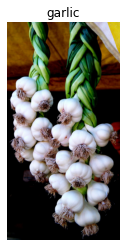

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='garlic')

**Jahe**

Image shape: (4032, 3024, 3)


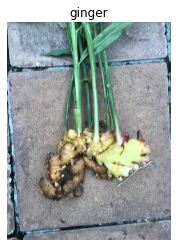

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='ginger')

**Anggur**

Image shape: (864, 648, 3)


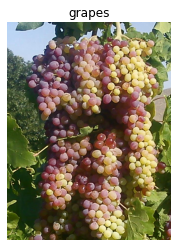

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='grapes')

**Jalapeno**

Image shape: (1600, 1600, 3)


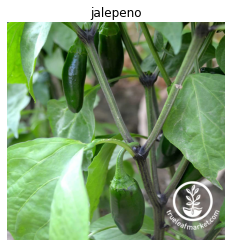

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='jalepeno')

**Kiwi**

Image shape: (787, 1400, 3)


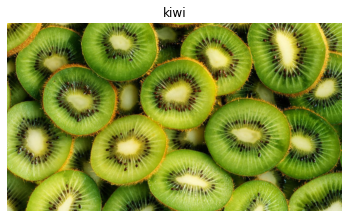

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='kiwi')

**Lemon**

Image shape: (393, 785, 3)


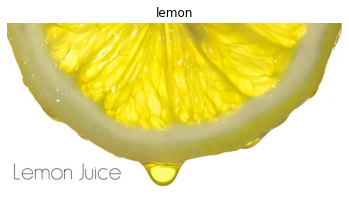

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='lemon')

**Selada**

Image shape: (380, 380, 4)


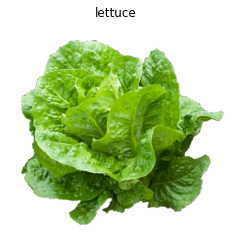

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='lettuce')

**Mangga**

Image shape: (600, 600, 3)


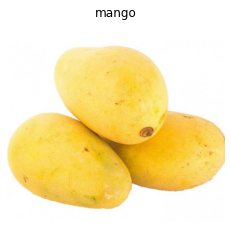

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='mango')

**Bawang Bombay**

Image shape: (1012, 1612, 3)


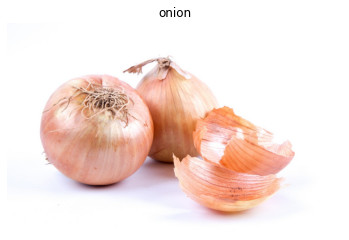

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='onion')

**Jeruk**

Image shape: (500, 740, 3)


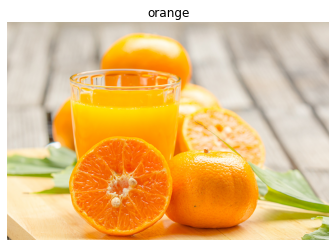

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='orange')

**Paprika**

Image shape: (1200, 1920, 3)


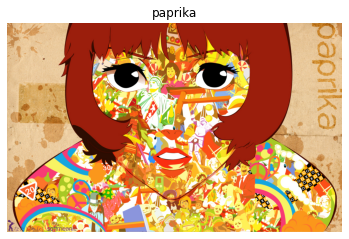

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='paprika')

**Pir**

Image shape: (1074, 2093, 3)


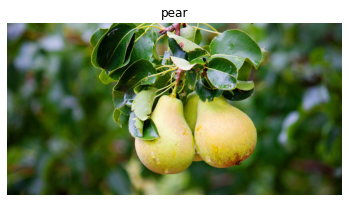

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='pear')

**Kacang Polong**

Image shape: (1920, 2560, 3)


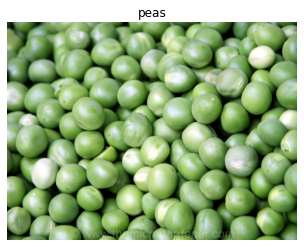

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='peas')

**Nanas**

Image shape: (961, 1200, 3)


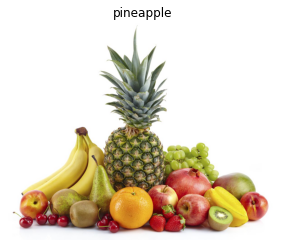

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='pineapple')

**Delima**

Image shape: (1825, 2737, 3)


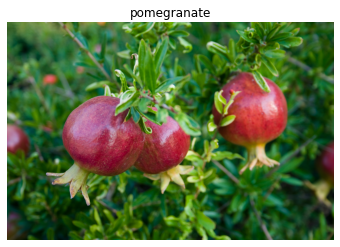

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='pomegranate')

**Kentang**

Image shape: (801, 1200, 3)


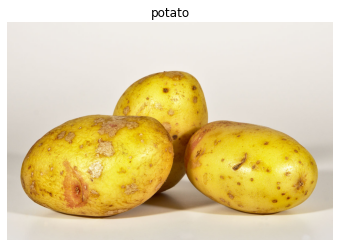

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='potato')

**Lobak**

Image shape: (904, 1600, 3)


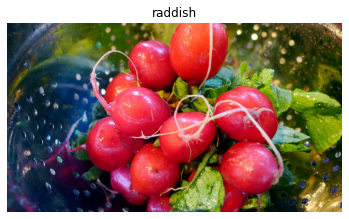

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='raddish')

**Kacang Kedelai**

Image shape: (600, 600, 3)


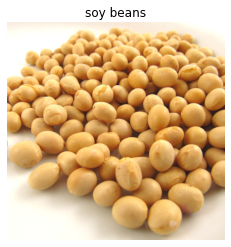

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='soy beans')

**Bayam**

Image shape: (768, 1024, 3)


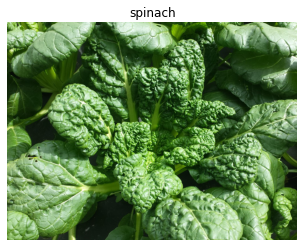

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='spinach')

**Jagung Manis**

Image shape: (450, 450, 3)


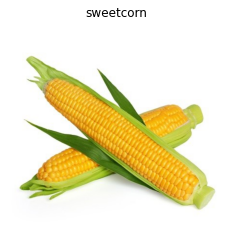

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='sweetcorn')

**Ubi Manis**

Image shape: (2182, 3274, 3)


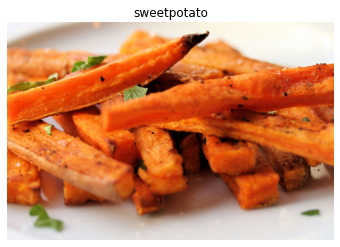

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='sweetpotato')

**Tomat**

Image shape: (1120, 1024, 3)


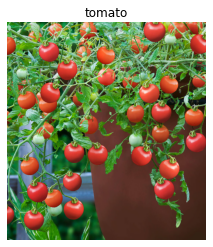

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='tomato')

**Lobak**:

Image shape: (850, 567, 3)


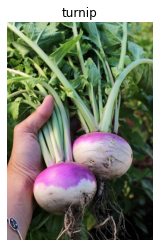

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='turnip')

**Semangka**

Image shape: (424, 600, 3)


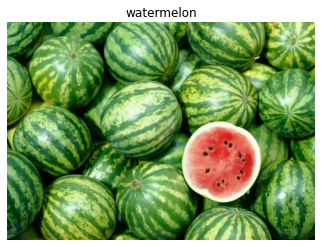

In [ ]:
img = view_random_image(target_dir='buah/train/', target_class='watermelon')

## Image Data Generator

**Menggunakan data generator karena ekspektasi untuk model deepleaning adalah data yang besar sehingga load data tidak didalam RAM berbarengan** 

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42) # Set random menjaga agar tidak ada perubahan setiap kali running
batch_size = 32

# Preprocess data dengan scalling
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_dir = 'buah/train/'
valid_dir = 'buah/validation/'
test_dir = 'buah/test/'

# Set data generator(memberikan gambar dengan targetnya)
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=batch_size,
                                               target_size=(256, 256),
                                               class_mode='categorical',
                                               seed=42)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=batch_size,
                                               target_size=(256, 256),
                                               class_mode='categorical',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               target_size=(256, 256),
                                               class_mode='categorical',
                                               seed=42)

test_data = valid_datagen.flow_from_directory(test_dir,
                                              target_size=(256, 256),
                                              class_mode='categorical',
                                              seed=42)

Found 3581 images belonging to 36 classes.
Found 3581 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


**Melihat perbedaan gambar original dan augmented**

In [9]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()
images_test, labels_test = test_data.next()

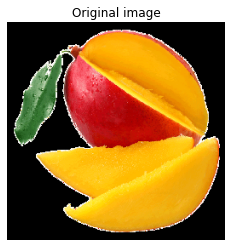

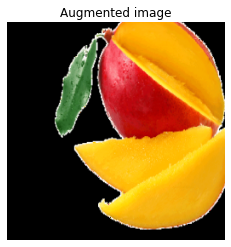

In [10]:
random_number = random.randint(0,5)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

# EDA Analysis
- Data sangat bervariasi mulai dari 200 sampai 3400 pixel
- Data punya 36 label yaitu: 'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7, 'chilli pepper': 8, 'corn': 9, 'cucumber': 10, 'eggplant': 11, 'garlic': 12, 'ginger': 13, 'grapes': 14, 'jalepeno': 15, 'kiwi': 16, 'lemon': 17, 'lettuce': 18, 'mango': 19, 'onion': 20, 'orange': 21, 'paprika': 22, 'pear': 23, 'peas': 24, 'pineapple': 25, 'pomegranate': 26, 'potato': 27, 'raddish': 28, 'soy beans': 29, 'spinach': 30, 'sweetcorn': 31, 'sweetpotato': 32, 'tomato': 33, 'turnip': 34, 'watermelon': 35 

# **Model Building**

## Model Convolutional Neural Network

In [11]:
tf.keras.backend.clear_session()

filters = 16
kernel_size = 3
strides = 2
pool_size = 2

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='SAME', activation='relu', input_shape=(256, 256, 3)))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=pool_size))

model.add(Conv2D(32, 3, padding='SAME', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))

model.add(Conv2D(64, 3, padding='SAME', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))

model.add(Conv2D(128, 3, padding='SAME', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))

model.add(Flatten())
model.add(Dense(200, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(100, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(36, activation='softmax')) # Activation terakhir menggunakan softmax karena model diharapkan hanya memprediksi 1 gambar saja

# Compiling model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 dropout (Dropout)           (None, 128, 128, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                    

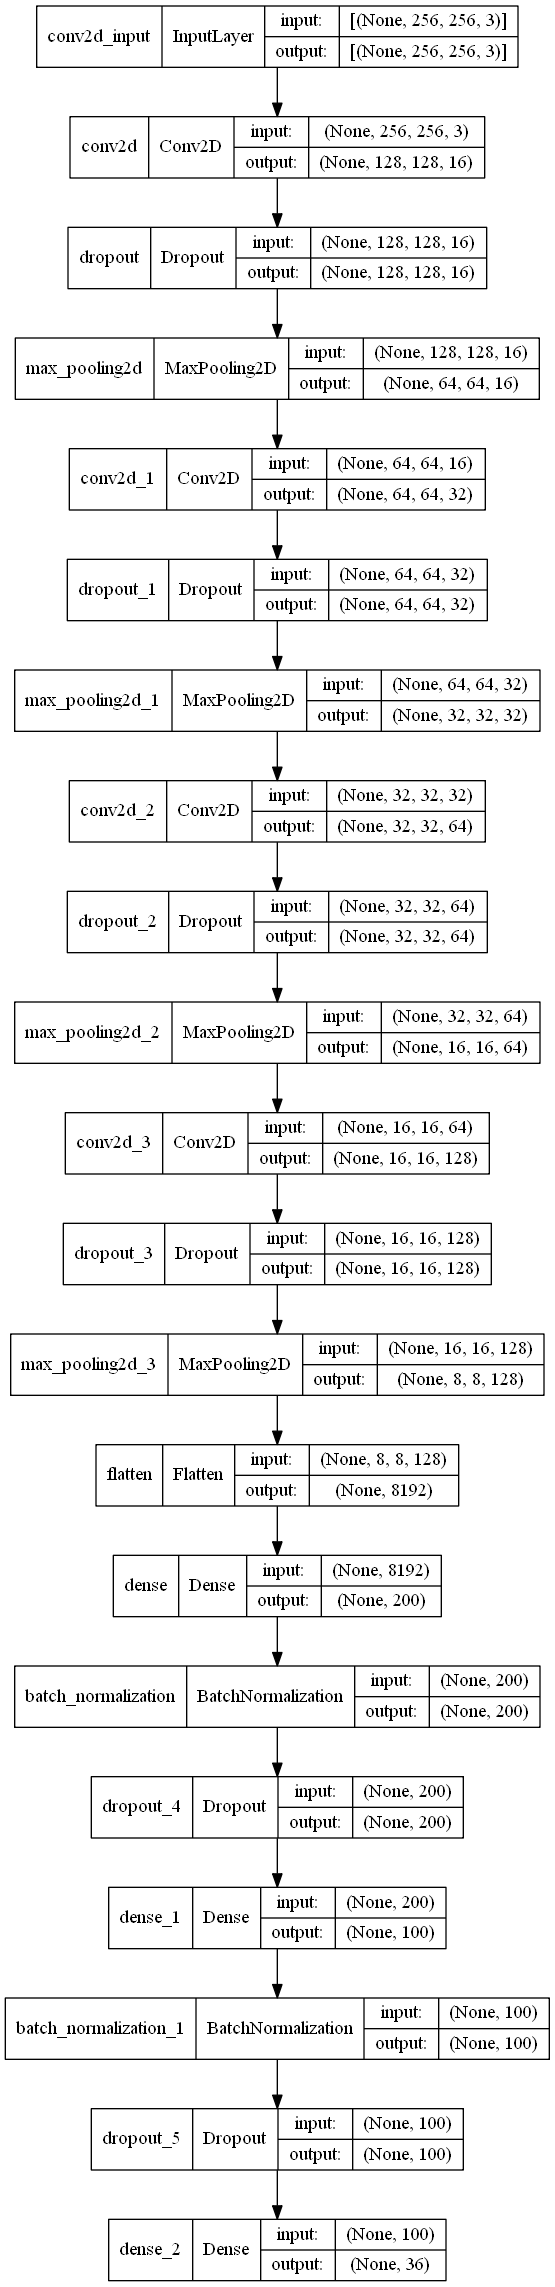

In [12]:
tf.keras.utils.plot_model(model,"CNN.png", show_shapes=True)

In [ ]:
# Training model
history = model.fit(train_data,
                    epochs=10,
                    validation_data=valid_data)

Epoch 1/10
 14/112 [==>...........................] - ETA: 4:44 - loss: 4.3468 - accuracy: 0.0246

C:\Users\harun\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


112/112 [==============================] - 356s 3s/step - loss: 3.5718 - accuracy: 0.0866 - val_loss: 3.3880 - val_accuracy: 0.0855
Epoch 2/10
 73/112 [==================>...........] - ETA: 1:27 - loss: 2.9781 - accuracy: 0.1665

In [14]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [15]:
model.evaluate(test_data)

12/12 [==============================] - 50s 4s/step - loss: 2.7990 - accuracy: 0.2061


[2.7990024089813232, 0.20612813532352448]

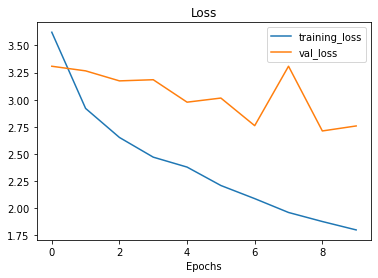

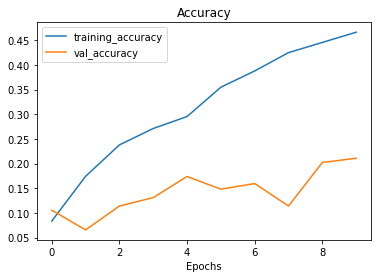

In [16]:
plot_loss_curves(history)

In [17]:
y_pred_base = np.argmax(model.predict(test_data), axis=-1)
y_pred_base

array([32,  4, 12,  0,  0, 12, 23,  0,  4, 34,  0, 33,  4,  0, 12,  4, 12,
       12, 19, 23, 12,  4, 23, 14, 12, 12,  4,  0, 33, 12, 23, 27, 34,  4,
       12, 12, 12, 34, 32, 12,  0, 12, 34, 12, 23, 34,  4, 27, 12,  0, 12,
        0,  4, 19, 12, 12, 12, 23, 27, 12, 12, 35, 12,  0, 12, 12, 12, 23,
        4,  4, 12, 19, 23, 23,  0, 27, 10, 19,  4, 12, 12, 12, 23, 12, 12,
       27, 23,  4,  4,  0, 31, 34,  0, 34,  4, 27, 23, 12,  4,  4, 34, 11,
       12, 12, 19, 34,  4, 12, 23, 23, 12, 12, 12, 12, 33,  0, 12, 12, 34,
        4, 19,  4, 12, 33,  0, 32, 34, 34, 12, 23, 27, 12, 34, 12, 12, 23,
       34, 12, 12,  4,  4, 12, 33, 33,  4, 27,  4, 12, 34, 33, 35,  4,  4,
       27,  4,  4, 12,  4, 35, 12, 12, 23,  4,  0,  0, 34, 32, 12,  4, 12,
       12,  4, 34, 23, 23, 23, 14, 27, 27,  4,  0, 19, 12, 12, 12,  4,  4,
       12,  0, 35, 35, 12, 34,  0, 12, 12,  4, 12, 12, 34, 12, 12,  4,  0,
        4, 23, 12, 12, 27, 12,  4, 34, 12,  0, 23, 23, 23, 12, 19, 32,  4,
       23, 27, 12, 23, 12

>- Didapatkan evaluasi loss: 2.3272 - accuracy: 0.2786
>- grafik menunjukkan terdapat kekonsistenan loss train dan validasi turun, akurasi train dan validasi naik namun perubahan per epoch belum convergen

# Fine Tuning

In [18]:
tf.keras.backend.clear_session()

# Menggunakan InceptionV3 karena menurut artikel pre-trained model ini bagus untuk buah
base_model = tf.keras.applications.InceptionV3(input_shape=(256, 256, 3),
                                               include_top=False,
                                               weights='imagenet')

87924736/87910968 [==============================] - 31s 0us/step


In [19]:
base_model.trainable = False # Digunakan agar pre-trained model tidak dilakukan training, model digunakan secara langsung

In [2]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

tf.keras.backend.clear_session()

inputs = Input(shape=(256, 256, 3))
layer_0 = base_model(inputs, training=False)
layer_0 = GlobalAveragePooling2D()(layer_0)
layer_0 = Dropout(0.2)(layer_0)

layer_1 = Dense(100, kernel_initializer='uniform', activation='leaky_relu')(layer_0)
layer_1 = Dropout(rate=0.2)(layer_1)
layer_1 = BatchNormalization()(layer_1)

layer_2 = Dense(100, kernel_initializer='uniform', activation='leaky_relu')(layer_1)
layer_2 = BatchNormalization()(layer_2)
layer_2 = Dropout(rate=0.2)(layer_2)

outputs = Dense(36, activation='softmax')(layer_2)
model_imp = Model(inputs, outputs)

model_imp.compile(loss="categorical_crossentropy",
                optimizer="rmsprop",
              metrics=['accuracy'])

NameError: name 'tf' is not defined

In [21]:
model_imp.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 100)               204900    
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                             

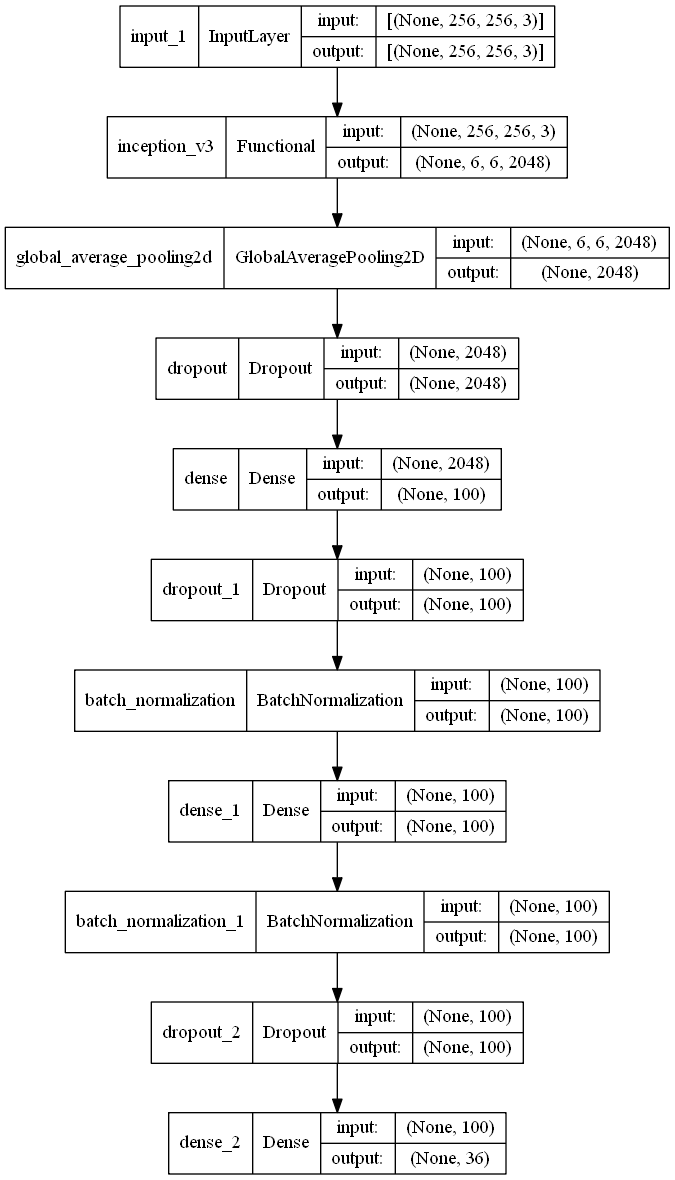

In [22]:
tf.keras.utils.plot_model(model_imp,"CNN.png", show_shapes=True)

In [1]:
# Fit the model
history = model_imp.fit(train_data,
                        epochs=10,
                        validation_data=valid_data)

NameError: name 'model_imp' is not defined

In [ ]:
model_imp.evaluate(test_data)

In [ ]:
plot_loss_curves(history)

In [ ]:
y_pred = np.argmax(model_imp.predict(test_data), axis=-1)
y_pred

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


array([15, 22, 20,  4, 34, 33,  2, 11, 10,  8, 12, 13,  5,  4, 20,  4,  6,
       25, 32, 20,  1, 10, 34,  8, 23,  2, 27, 34,  2, 27, 16,  2,  8, 31,
       21,  2, 14, 29, 21, 24, 23, 17,  8, 15, 17, 34, 28, 12, 21, 24, 10,
       26, 28, 33, 23,  1,  4,  4, 18, 23, 27, 27, 30, 22, 24,  6, 35,  3,
       30,  3,  1, 30, 31, 22, 23,  7, 20, 19,  4,  7,  1, 32,  4,  0, 27,
       12, 16, 30, 14, 35, 15, 13, 29, 25, 16, 35,  5, 20,  0, 30,  1, 20,
       32, 35, 24, 24, 34, 22, 23, 15,  2,  6, 16, 16, 14, 16, 17, 25, 33,
       20, 14, 32,  7,  9,  6, 31, 31,  6, 27, 32, 35, 31, 22, 12, 23, 25,
       35, 32, 28, 17, 17,  1, 10, 31, 14, 13,  3,  3,  5, 33, 25,  1, 28,
       33, 34, 21, 18, 15, 19, 14, 27, 26, 35,  3, 11, 26, 29,  6, 17, 31,
       33, 18, 25,  3, 14, 13, 26, 18, 11, 24, 14, 30, 30, 31, 31, 24,  8,
       22, 19, 32, 13,  3,  3,  7,  2, 29, 17, 11, 13, 35, 28,  1, 11, 17,
       12, 12, 19,  4, 20, 25, 23, 10, 28, 32,  6,  7,  8,  1,  4, 19, 32,
       16,  2, 21, 31, 16

# Model Analysis

- Pertama dilaukan model convolutional neural network dengan 4 convolusi dan 2 hidden layer didapatkan hasil loss: 2.3272 dan accuracy: 0.2786 dengan grafik kurang konvergen, kemudian dilakukan pretrained model InceptionV3 dengan 2 hidden layer didapatkan hasil loss: 0.1279 - accuracy: 0.9582 dengan grafik yang konvergen. Sehingga setelah dilakukan model improvement didapatkan hasil yang lebih baik. 

# Model Inference

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
from google.colab import files
files.upload()

{}

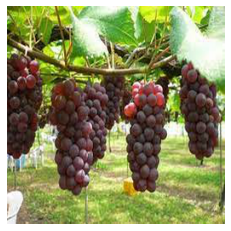

In [ ]:
from PIL import Image
new_img = Image.open('anggur.jpg')
new_img = new_img.resize((256,256), Image.ANTIALIAS)
plt.imshow(new_img);
plt.axis(False);

In [ ]:
new_img = tf.expand_dims(np.array(new_img), axis=0)
inference = model_imp.predict(new_img)
inference.argmax()

0

In [ ]:
print(train_data.class_indices)

{'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7, 'chilli pepper': 8, 'corn': 9, 'cucumber': 10, 'eggplant': 11, 'garlic': 12, 'ginger': 13, 'grapes': 14, 'jalepeno': 15, 'kiwi': 16, 'lemon': 17, 'lettuce': 18, 'mango': 19, 'onion': 20, 'orange': 21, 'paprika': 22, 'pear': 23, 'peas': 24, 'pineapple': 25, 'pomegranate': 26, 'potato': 27, 'raddish': 28, 'soy beans': 29, 'spinach': 30, 'sweetcorn': 31, 'sweetpotato': 32, 'tomato': 33, 'turnip': 34, 'watermelon': 35}


**Model memprediksi apel**

In [ ]:
from google.colab import files
files.upload()

Saving lobak.jpg to lobak.jpg


{'lobak.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x13\x13\x13\x16\x15\x15\x17\x17\x1a\x1a\x17\x17\x18\x18\x18\x18\x1d\x1a\x1a\x19\x1a\x18\x17\x18\x1d\x18\x1d\x18\x1d( \x1a\x1a%\x1b\x1d\x17!1!%)+...\x1a\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1b-% %---------///-----------------------------------5--\xff\xc0\x00\x11\x08\x00\xb7\x01\x13\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x02\x03\x04\x06\x07\x01\x08\xff\xc4\x00<\x10\x00\x01\x02\x04\x04\x03\x06\x05\x03\x03\x04\x02\x03\x01\x00\x00\x01\x02\x11\x00\x03!1\x04\x05\x12AQaq\x06\x13"\x81\x91\xa12\xb1\xc1\xd1\xf0BR\xe1#b\xf1\x143r\x82\x07\xa2\x92\xb2\xc2\x15\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x01\x00\x05\xff\xc4\x00(\x11\x00\x02\x02\x02\x02\x01\x03\x04\x02\x03\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03!\x121A\x0

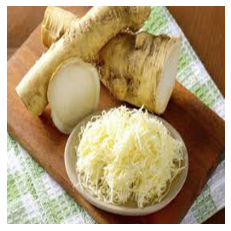

In [ ]:
from PIL import Image
new_img2 = Image.open('lobak.jpg')
new_img2 = new_img2.resize((256,256), Image.ANTIALIAS)
plt.imshow(new_img2);
plt.axis(False);

In [ ]:
new_img2 = tf.expand_dims(np.array(new_img2), axis=0)
inference = model_imp.predict(new_img2)
inference.argmax()

0

In [ ]:
print(train_data.class_indices)

{'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7, 'chilli pepper': 8, 'corn': 9, 'cucumber': 10, 'eggplant': 11, 'garlic': 12, 'ginger': 13, 'grapes': 14, 'jalepeno': 15, 'kiwi': 16, 'lemon': 17, 'lettuce': 18, 'mango': 19, 'onion': 20, 'orange': 21, 'paprika': 22, 'pear': 23, 'peas': 24, 'pineapple': 25, 'pomegranate': 26, 'potato': 27, 'raddish': 28, 'soy beans': 29, 'spinach': 30, 'sweetcorn': 31, 'sweetpotato': 32, 'tomato': 33, 'turnip': 34, 'watermelon': 35}


**Model memprediksi apel**

# Model Saving

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_imp.save('my_model.h5')

In [ ]:
model_version = "0001"
model_name = "model_CNN"
model_path = os.path.join(model_name, model_version)
model_path

'model_CNN/0001'

In [ ]:
!rm -rf {model_name}

In [ ]:
tf.saved_model.save(model_imp, model_path)

INFO:tensorflow:Assets written to: model_CNN/0001/assets


In [ ]:
for root, dirs, files in os.walk(model_name):
    indent = '    ' * root.count(os.sep)
    print('{}{}/'.format(indent, os.path.basename(root)))
    for filename in files:
        print('{}{}'.format(indent + '    ', filename))

model_CNN/
    0001/
        saved_model.pb
        variables/
            variables.data-00000-of-00001
            variables.index
        assets/


In [ ]:
!saved_model_cli show --dir {model_path}

The given SavedModel contains the following tag-sets:
'serve'


In [ ]:
!saved_model_cli show --dir {model_path} --tag_set serve

The given SavedModel MetaGraphDef contains SignatureDefs with the following keys:
SignatureDef key: "__saved_model_init_op"
SignatureDef key: "serving_default"


In [ ]:
!saved_model_cli show --dir {model_path} --tag_set serve \
                      --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 256, 256, 3)
      name: serving_default_input_1:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_2'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 36)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [ ]:
!saved_model_cli show --dir {model_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 256, 256, 3)
        name: serving_default_input_1:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_2'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 36)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Defined Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
          input_1: TensorS

In [ ]:
np.save("buah_test.npy", new_img)